**Assignment - Discussion 9.1: Which Cross-Validation Is Best? - Section C**

Using a dataset of your own, explore the data utilizing multiple cross-validation techniques. Choose the most appropriate cross-validation technique for your data.

In your initial post, describe your data, state which cross-validation technique you used, and explain your rationale for deciding on which cross-validation technique was the most appropriate for your specific dataset.

**Submission**

Dataset chosen: https://www.kaggle.com/datasets/juanmerinobermejo/us-sales-cars-dataset/data

Research Question: Which cross-validation technique yields the best model for predicting the sales price of the car based upon Year, Model, Mileage, and New vs Certified status

In [ ]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import root_mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
plt.style.use('ggplot')

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 52.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from sklearn.metrics import root_mean_squared_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!file -i /content/drive/MyDrive/MLAI_Haas/Module9/cars.csv

/content/drive/MyDrive/MLAI_Haas/Module9/cars.csv: text/csv; charset=utf-16le


In [ ]:
cars = pd.read_csv('/content/drive/MyDrive/MLAI_Haas/Module9/cars.csv', encoding='utf-16le')

In [ ]:
cars.head()

,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Mazda,CX-5,2023,New,NaN,NaN,36703.0
1,Kia,Sportage,2023,New,NaN,Classic Kia,28990.0
2,Chevrolet,Camaro,2024,New,NaN,Classic Chevrolet Beaumont,41425.0
3,Ford,Bronco,2023,Used,1551.0,Mike Smith Chrysler Dodge Jeep RAM,58900.0
4,Acura,TLX,2021,Used,30384.0,Mike Smith Nissan,34499.0


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Brand    144867 non-null  object 
 1   Model    144867 non-null  object 
 2   Year     144867 non-null  int64  
 3   Status   144867 non-null  object 
 4   Mileage  55914 non-null   float64
 5   Dealer   144539 non-null  object 
 6   Price    140956 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 7.7+ MB


In [ ]:
#Drop string features with too many values to encode
cars_clean=cars.drop(['Dealer', 'Model'], axis=1)

In [ ]:
cars.describe()


,Year,Mileage,Price
count,144867.000000,55914.000000,1.409560e+05
mean,2021.374716,52720.606485,5.267889e+04
std,3.995397,44014.784892,4.221504e+04
min,1959.000000,0.000000,1.000000e+00
25%,2021.000000,20116.000000,3.211000e+04
50%,2023.000000,41417.500000,4.707200e+04
75%,2024.000000,73590.750000,6.531125e+04
max,2024.000000,419096.000000,8.078160e+06


DATA CLEANING

In [ ]:
#Identify duplicate data
cars.duplicated().value_counts()

False    139478
True       5389
Name: count, dtype: int64

In [ ]:
#Drop duplicates
cars.drop_duplicates(keep=False, inplace=True)
cars.shape #check results after drop


(135618, 7)

In [ ]:
#Identify missing data
cars.isnull().sum()

Brand          0
Model          0
Year           0
Status         0
Mileage    79866
Dealer       305
Price       1642
dtype: int64

In [ ]:
#Drop missing data
cars_nona=cars_clean.dropna()
cars_nona.shape

(55738, 5)

In [ ]:
#Describe categorical features
categorical = cars_nona.select_dtypes(include=['object']).columns
for column in categorical:
    print(column, cars_nona[column].unique())


Brand ['Ford' 'Acura' 'Volkswagen' 'GMC' 'Infiniti' 'Lexus' 'Toyota' 'Mazda'
 'Honda' 'Lincoln' 'Mercury' 'Cadillac' 'BMW' 'Chevrolet' 'Hyundai'
 'Land Rover' 'Audi' 'Mercedes' 'Jeep' 'Porsche' 'Kia' 'MINI' 'Nissan'
 'Subaru' 'RAM' 'Maserati' 'Tesla' 'Bentley' 'Dodge' 'Mitsubishi' 'FIAT'
 'Rivian' 'Genesis' 'Aston Martin' 'Buick' 'Jaguar' 'Lamborghini' 'Hummer'
 'Saturn' 'Rolls-Royce' 'Volvo' 'Ferrari' 'Polestar' 'Lucid' 'Alfa Romeo'
 'Scion' 'Chrysler' 'Pontiac' 'Karma' 'Smart' 'McLaren' 'Lotus' 'Saab'
 'Maybach' 'Suzuki' 'International Scout' 'Plymouth' 'Geo' 'Isuzu'
 'Oldsmobile' 'Bugatti' 'Eagle']
Status ['Used' 'Certified']


In [ ]:
cars_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55738 entries, 3 to 144855
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    55738 non-null  object 
 1   Year     55738 non-null  int64  
 2   Status   55738 non-null  object 
 3   Mileage  55738 non-null  float64
 4   Price    55738 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.6+ MB


In [ ]:
#Create dummies for categorical features and add to dataframe
dummies=pd.get_dummies(cars_nona['Status'], dtype=int)
cars_dummies=pd.concat([cars_nona, dummies], axis=1)
cars_dummies.head()

,Brand,Year,Status,Mileage,Price,Certified,Used
3,Ford,2023,Used,1551.0,58900.0,0,1
4,Acura,2021,Used,30384.0,34499.0,0,1
5,Volkswagen,2022,Certified,13895.0,34000.0,1,0
6,GMC,2021,Used,68506.0,56954.0,0,1
16,Infiniti,2019,Used,29009.0,23589.0,0,1


In [ ]:
dummies1=pd.get_dummies(cars_dummies['Brand'], dtype=int)
cars_dummies1=pd.concat([cars_dummies, dummies1], axis=1)
cars_dummies1.head()

,Brand,Year,Status,Mileage,Price,Certified,Used,Acura,Alfa Romeo,Aston Martin,...,Saab,Saturn,Scion,Smart,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
3,Ford,2023,Used,1551.0,58900.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Acura,2021,Used,30384.0,34499.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Volkswagen,2022,Certified,13895.0,34000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,GMC,2021,Used,68506.0,56954.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,Infiniti,2019,Used,29009.0,23589.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Drop redundant string features
cars_final=cars_dummies1.drop(['Brand', 'Status'], axis=1)
cars_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55738 entries, 3 to 144855
Data columns (total 67 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 55738 non-null  int64  
 1   Mileage              55738 non-null  float64
 2   Price                55738 non-null  float64
 3   Certified            55738 non-null  int64  
 4   Used                 55738 non-null  int64  
 5   Acura                55738 non-null  int64  
 6   Alfa Romeo           55738 non-null  int64  
 7   Aston Martin         55738 non-null  int64  
 8   Audi                 55738 non-null  int64  
 9   BMW                  55738 non-null  int64  
 10  Bentley              55738 non-null  int64  
 11  Bugatti              55738 non-null  int64  
 12  Buick                55738 non-null  int64  
 13  Cadillac             55738 non-null  int64  
 14  Chevrolet            55738 non-null  int64  
 15  Chrysler             55738 non-null  int

PREP FOR MODELING

In [ ]:
#Define predictor and target features
X = cars_final.drop('Price', axis=1)
y = cars_final['Price']
X.shape

(55738, 66)

In [ ]:
#Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(X_train), type(y_train))#



(39016, 66)
(16722, 66)
(39016,)
(16722,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
y_train.head()


94093     34499.0
3441      50496.0
16037    399702.0
4624      11998.0
77341     24056.0
Name: Price, dtype: float64

In [ ]:
cars_final.describe()


,Year,Mileage,Price,Certified,Used,Acura,Alfa Romeo,Aston Martin,Audi,BMW,...,Saab,Saturn,Scion,Smart,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
count,55738.000000,55738.000000,5.573800e+04,55738.000000,55738.000000,55738.000000,55738.000000,55738.000000,55738.000000,55738.000000,...,55738.000000,55738.000000,55738.000000,55738.000000,55738.000000,55738.000000,55738.000000,55738.000000,55738.000000,55738.000000
mean,2018.165201,52728.065557,3.923569e+04,0.135975,0.864025,0.021027,0.002530,0.001023,0.041892,0.061305,...,0.000233,0.000556,0.000933,0.000144,0.017205,0.000108,0.015752,0.115254,0.021440,0.016039
std,4.915649,44017.750706,3.649824e+04,0.342766,0.342766,0.143475,0.050233,0.031963,0.200345,0.239890,...,0.015270,0.023577,0.030530,0.011980,0.130038,0.010375,0.124517,0.319330,0.144846,0.125628
min,1959.000000,0.000000,1.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,20125.250000,2.174475e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.000000,41415.000000,3.284650e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2021.000000,73602.000000,4.699000e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,419096.000000,3.399000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: ylabel='Density'>

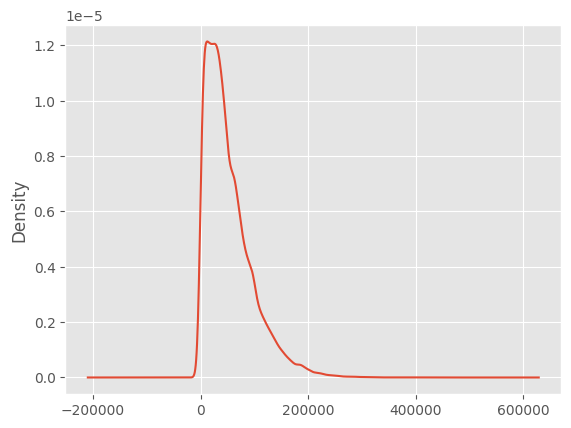

In [ ]:
cars_final['Mileage'].plot(kind = 'kde')

SCALING

In [ ]:
# Scale the data
X_train_scaled = X_train
X_test_scaled = X_test

# Using standard scaler
scale = StandardScaler()

# Use 'fit transform' on the train dataset
X_train_scaled[:] = scale.fit_transform(X_train[:])

# Test data scaling
X_test_scaled[:] = scale.transform(X_test[:])

#Check results
X_train_scaled


,Year,Mileage,Certified,Used,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,...,Saab,Saturn,Scion,Smart,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
94093,0.580282,-0.696521,-0.395353,0.395353,-0.145605,-0.049924,-0.033981,-0.208269,3.940203,-0.046172,...,-0.011321,-0.022647,-0.031632,-0.011321,-0.134572,-0.012402,-0.128626,-0.361074,-0.149235,-0.126864
3441,0.784483,-0.833467,-0.395353,0.395353,-0.145605,-0.049924,-0.033981,-0.208269,-0.253794,-0.046172,...,-0.011321,-0.022647,-0.031632,-0.011321,-0.134572,-0.012402,-0.128626,2.769517,-0.149235,-0.126864
16037,0.784483,-1.190378,-0.395353,0.395353,-0.145605,-0.049924,-0.033981,-0.208269,-0.253794,-0.046172,...,-0.011321,-0.022647,-0.031632,-0.011321,-0.134572,-0.012402,-0.128626,-0.361074,-0.149235,-0.126864
4624,-0.849120,0.686827,-0.395353,0.395353,-0.145605,-0.049924,-0.033981,-0.208269,-0.253794,-0.046172,...,-0.011321,-0.022647,-0.031632,-0.011321,-0.134572,-0.012402,-0.128626,-0.361074,-0.149235,-0.126864
77341,-0.032318,0.292492,-0.395353,0.395353,-0.145605,-0.049924,-0.033981,-0.208269,-0.253794,-0.046172,...,-0.011321,-0.022647,-0.031632,-0.011321,-0.134572,-0.012402,-0.128626,-0.361074,-0.149235,-0.126864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105863,-0.644919,1.043534,-0.395353,0.395353,-0.145605,-0.049924,-0.033981,-0.208269,-0.253794,-0.046172,...,-0.011321,-0.022647,-0.031632,-0.011321,-0.134572,-0.012402,-0.128626,-0.361074,-0.149235,-0.126864
142058,0.784483,-1.014210,2.529387,-2.529387,-0.145605,-0.049924,-0.033981,-0.208269,-0.253794,-0.046172,...,-0.011321,-0.022647,-0.031632,-0.011321,-0.134572,-0.012402,-0.128626,-0.361074,-0.149235,-0.126864
85433,0.988683,-0.959168,2.529387,-2.529387,-0.145605,-0.049924,-0.033981,-0.208269,-0.253794,-0.046172,...,-0.011321,-0.022647,-0.031632,-0.011321,-0.134572,-0.012402,-0.128626,-0.361074,-0.149235,-0.126864
1663,0.784483,-0.642024,-0.395353,0.395353,-0.145605,-0.049924,-0.033981,-0.208269,-0.253794,-0.046172,...,-0.011321,-0.022647,-0.031632,-0.011321,-0.134572,-0.012402,-0.128626,-0.361074,-0.149235,-0.126864


<Axes: ylabel='Density'>

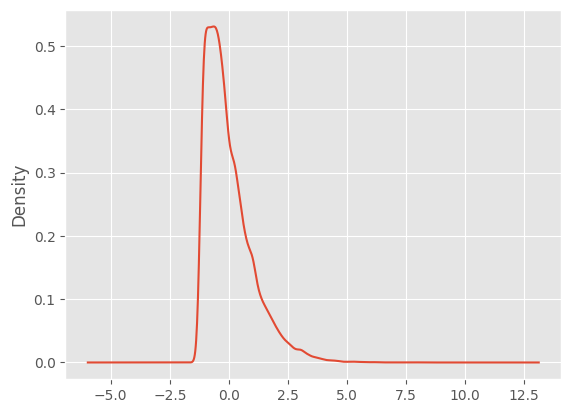

In [ ]:
X_train_scaled['Mileage'].plot(kind = 'kde')

ANALYSIS

1. Simple Cross Validation (Hold Out), 30% of data held out as test set

In [ ]:
#Define and fit the model, predict values for X in training and test sets and calculate MSEs
#Create a timer to log how long each CV technique takes

start_time = time.time()
model = LinearRegression()
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
end_time = time.time()
time_taken = end_time - start_time

# Answer check
print(f'Time taken: {end_time - start_time}')
print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')

Time taken: 0.2345287799835205
Train MSE:  476113048.16
Test MSE:  561075202.32


2. K-fold Cross Validation

In [ ]:
#Define and fit the model, predict values for X in training and test sets and calculate MSEs
#Create a timer to log how long each CV technique takes

start_time = time.time()
kfold = KFold(n_splits=5, shuffle=True)
kfold_mse_scores = cross_val_score(estimator=model, X=X, y=y, cv=kfold, scoring='neg_mean_squared_error')
end_time = time.time()
time_taken = end_time - start_time

# Answer check
print(f'Time taken: {end_time - start_time}')
print(f'Mean MSE score: {abs(kfold_mse_scores.mean())}')

Time taken: 1.2690074443817139
Mean MSE score: 703369808.5683888


3. Leave One Out

In [ ]:
#Define and fit the model, predict values for X in training and test sets and calculate MSEs
#Create a timer to log how long each CV technique takes

start_time = time.time()
loo_mse_scores = cross_val_score(estimator=model, X=X, y=y, cv=LeaveOneOut(), scoring='neg_mean_squared_error')
end_time = time.time()
time_taken = end_time - start_time

# Answer check
print(f'Time taken: {time_taken}')
print(f'Mean MSE score: {abs(loo_mse_scores.mean())}')


KeyboardInterrupt: 